### 나일강 유량 예측

In [1]:
import pandas as pd

df = pd.read_csv('Data/nile.csv')
df.head()

,x
0,1120
1,1160
2,963
3,1210
4,1160


<Axes: >

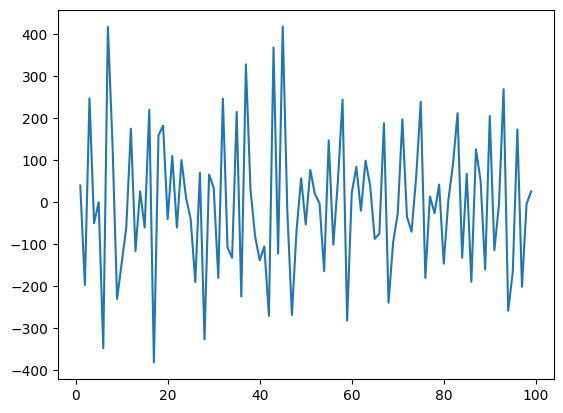

In [2]:
#1차 차분 데이터
diff1 = df['x'].diff(periods=1).iloc[1:]
diff1.plot()

In [3]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
# 로그 후 차분한 자료를 adfuller 함수로 안정적인 시계열인지 확인
diff1 = np.log(df['x']).diff(periods=1).iloc[1:]
result=adfuller(diff1)
print(result)
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
# p-value 0.000068이 0.05보다 작으므로 95% 신뢰수준 하에서 유의함(안정적인 시계열 자료임)


(-4.7484147860124795, 6.818878743916549e-05, 9, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, -64.46023083112888)
ADF Statistics: -4.748415
p-value: 0.000068


In [4]:
from pmdarima.arima import auto_arima
model = auto_arima(df, suppress_warnings=True)
model
# 가장 적절한 모형은 arima(1,1,1)
    # arima(p,d,q) 
    # p: 타임스텝 (1: 올해의 유량은 1년전, 작년의 영향을 받음)
    # q: 이동평균 
    # d: 차분차수

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
# 학습용, 검증용 구분 (데이터 shuffle안함)
n = int(df.shape[0]*0.8)
train = df[:n]   
test = df[n:]
print(len(df['x']))
print(train['x'].values)
print(test['x'].values)

100
[1120 1160  963 1210 1160 1160  813 1230 1370 1140  995  935 1110  994
 1020  960 1180  799  958 1140 1100 1210 1150 1250 1260 1220 1030 1100
  774  840  874  694  940  833  701  916  692 1020 1050  969  831  726
  456  824  702 1120 1100  832  764  821  768  845  864  862  698  845
  744  796 1040  759  781  865  845  944  984  897  822 1010  771  676
  649  846  812  742  801 1040  860  874  848  890]
[ 744  749  838 1050  918  986  797  923  975  815 1020  906  901 1170
  912  746  919  718  714  740]


In [6]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1,1,1)).fit()
predictions = model.predict(start=1, end=len(test), dynamic=False)
# dynamic=False`는 예측 시간에 실제 관측값을 사용하여 예측하지 않고, 모델 자체의 예측값만 사용한다는 의미
predictions.index=len(train)+(predictions.index-1)
# `predictions.index-1`은 0부터 시작하는 인덱스를 1부터 시작하는 인덱스로 조정
# `len(train)+(predictions.index-1)`은 학습 데이터의 길이를 고려하여 인덱스를 조정
predictions

80    1108.694660
81    1138.469883
82    1036.627962
83    1142.449874
84    1132.672522
85    1137.599690
86     991.285064
87    1139.596737
88    1211.331148
89    1139.844054
90    1080.867167
91    1044.754123
92    1100.176361
93    1055.036289
94    1057.275677
95    1028.422849
96    1106.927010
97     965.131281
98    1006.482027
99    1072.345243
Name: predicted_mean, dtype: float64

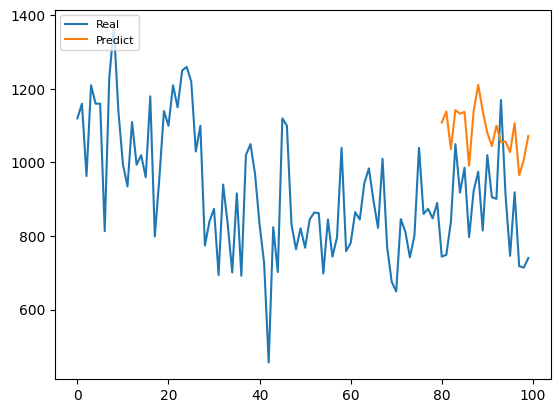

In [7]:
import matplotlib.pyplot as plt
plt.plot(df, label='Real')
plt.plot(predictions, label='Predict')
plt.legend(loc='upper left', fontsize=8)
plt.show()   # arima모델 예측값이 높게 나옴.

In [8]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
rmse 

236.3149703624835

In [9]:
print(mse)
print(rmse)   # 평균제곱근오차가 매우 큼

55844.76521742146
236.3149703624835
